In [34]:
# import modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, make_scorer
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [35]:
# age               : Int
# education         : Categorical
# education level   : Int
# marital status    : Categorical
# Occupation        : Catagorical
# relationship      : Categorical
# race              : Categorical
# sex               : Categorical
# Investment profit : Int, but almost all 0
# Investment loss   : Int, but almost all 0
# hours per week    : Int
# native country    : Categorical
# income            : Conditional (e.g. <=50k, >50k)

In [36]:
df = pd.read_csv('data/survey.csv')
df = df.drop(columns=['Investment profit', 'Investment loss'])

# Encoding
LabelEncoders = {}
for col in df.columns:
    if col not in ['age', 'education level', 'Investment profit', 'Investment loss', 'hours per week']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        LabelEncoders[col] = le

def make_submit(df: pd.DataFrame, file_name: str) -> None:
    submit = pd.DataFrame()
    submit['ID'] = df.index
    submit['Employment Type'] = df['Employment Type']
    submit.to_csv(f'{file_name}.csv', index=False)

# k-means

In [37]:
def find_best_k(df: pd.DataFrame, k_range: range) -> None:
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        print(f'k={k}, silhouette_score={silhouette_score(df, kmeans.labels_)}')

def learn_kmeans(df: pd.DataFrame, k: int) -> KMeans:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    return kmeans

# find_best_k(df, range(2, 10))
# kmeans = learn_kmeans(df, 5)
# make_submit(kmeans, 'submit_kmeans')

# GMM

In [45]:
from sklearn.mixture import GaussianMixture

def find_best_k_gmm(df: pd.DataFrame, k_range: range) -> int:
    best_k, best_score = 0, -1
    for k in k_range:
        gmm = GaussianMixture(n_components=k)
        gmm.fit(df)
        score = silhouette_score(df, gmm.predict(df))
        print(f'k={k}, silhouette_score={score}')
        if score > best_score:
            best_k, best_score = k, score
    return best_k

def learn_gmm(df: pd.DataFrame, k: int) -> GaussianMixture:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(df)
    return gmm

best_k = find_best_k_gmm(df, range(2, 20))
gmm = learn_gmm(df, best_k)
print(best_k)
make_submit(pd.DataFrame(gmm.predict(df), columns=['Employment Type']), 'submit_gmm')

k=2, silhouette_score=0.050460363530417
k=3, silhouette_score=0.028734794803596968
k=4, silhouette_score=0.006575461297723906
k=5, silhouette_score=-0.0013173439974565368
k=6, silhouette_score=0.006785456533653496
k=7, silhouette_score=-0.1297384950538332
k=8, silhouette_score=-0.05535821822803008
k=9, silhouette_score=-0.03995584293333151
k=10, silhouette_score=-0.06567461473299405
k=11, silhouette_score=-0.08826623777340456
k=12, silhouette_score=-0.15685246831375924
k=13, silhouette_score=-0.11462906654247858
k=14, silhouette_score=-0.18292449659141802
k=15, silhouette_score=-0.16728378013028494
k=16, silhouette_score=-0.23132749093542207
k=17, silhouette_score=-0.26412143195263776
k=18, silhouette_score=-0.3140977114999394
k=19, silhouette_score=-0.26135411116056223
2


# Dimension reduction

NameError: name 'reducted_df' is not defined

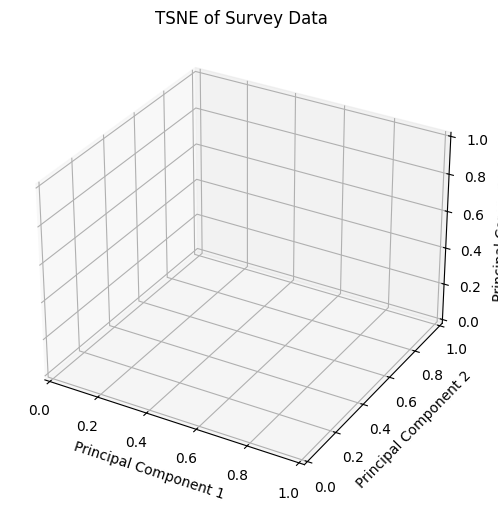

In [39]:
# # Perform PCA or TSNE
# reducted = TSNE(n_components=3)
# principal_components = reducted.fit_transform(df)

# reducted_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# # 2D Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(reducted_df['PC1'], reducted_df['PC2'], c=kmeans.labels_, cmap='viridis')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('TSNE of Survey Data')
# plt.colorbar(label='Cluster Label')
# plt.show()

# # 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('TSNE of Survey Data')
scatter = ax.scatter(reducted_df['PC1'], reducted_df['PC2'], reducted_df['PC3'], c=dbscan.labels_, cmap='viridis')
fig.colorbar(scatter, label='Cluster Label')
plt.show()